In [1]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))  #위치정하는 것 {2: }-> 두번째
    

In [2]:
#0-1까지 20개 
np.random.rand(20)
np.random.uniform(0,1,20)
np.random.random(20)

array([0.56215694, 0.00535282, 0.63047207, 0.46565165, 0.95708369,
       0.77099067, 0.41776892, 0.74591101, 0.03159415, 0.55776096,
       0.53836739, 0.8666259 , 0.10958107, 0.12337001, 0.85275315,
       0.09334959, 0.40223927, 0.86910318, 0.65143683, 0.39940403])

array([0., 4., 1.])

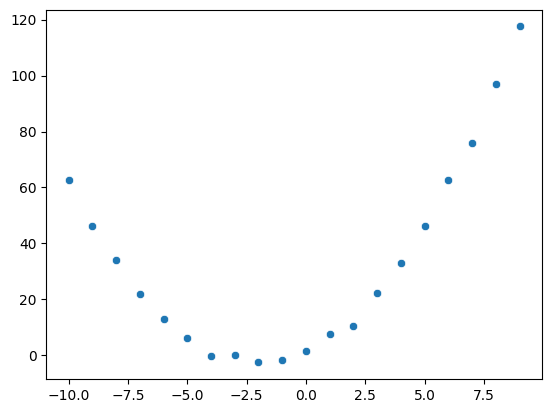

In [3]:
# 다항회귀 코드 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 


np.random.seed=1234
X= np.arange(-10,10)
y= 1+ 4*X + X**2 +np.random.randn(20) #random이 noise 

y

sns.scatterplot(x=X,y=y)

#다항회귀 계수 
poly_ftr=PolynomialFeatures(degree=2).fit_transform(X.reshape(-1,1))
model=LinearRegression()
model.fit(poly_ftr,y)
np.round(model.coef_) #원래답 y= 1+ 4*X + X**2 +np.random.randn(20) => 1,4,1

* 10개의 변수로 전역탐색 할경우 2차 적용까지 고려한 변수 조합의 가짓수 
10C1 + 10C2 = 10 + 45 = 55

# 로지스틱 회귀

In [4]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X= cancer.data[:,:5]
from sklearn.preprocessing import StandardScaler
#StandardScaler로 평균 0 분산 1 로 만듬 
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data[:,:5])
#쪼개기 
X_train,X_test,y_train,y_test= train_test_split(data_scaled, cancer.target,
                                               test_size=0.3, random_state=0)

#로지스틱회귀 사용  디폴트 solver='lbfgs'
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)

#accuracy 와 rocauc 측정
acc=accuracy_score(y_test,pred)
auc=roc_auc_score(y_test,pred)
print(f"정확도:{acc}, AUC:{auc}")

정확도:0.9239766081871345, AUC:0.9166666666666666


In [5]:
#서로다른 solver값으로 logistic 학습

solvers=['lbfgs','liblinear','newton-cg' ,'newton-cholesky' ,'sag', 'saga'  ]
for solver in solvers:
    lr_clf=LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train,y_train)
    pred=lr_clf.predict(X_test)

#accuracy 와 rocauc 측정
    print("solver:{0},정확도:{1}, AUC:{2}".format(
    solver,accuracy_score(y_test,pred),roc_auc_score(y_test,pred)))

solver:lbfgs,정확도:0.9239766081871345, AUC:0.9166666666666666
solver:liblinear,정확도:0.9239766081871345, AUC:0.9166666666666666
solver:newton-cg,정확도:0.9239766081871345, AUC:0.9166666666666666
solver:newton-cholesky,정확도:0.9239766081871345, AUC:0.9166666666666666
solver:sag,정확도:0.9239766081871345, AUC:0.9166666666666666
solver:saga,정확도:0.9239766081871345, AUC:0.9166666666666666


In [6]:
#10-12만 뽑아서 파라미터 변경하고 최적 뽑기 
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()
cancer.data= cancer.data[:,10:12]
x = scaler.fit_transform(cancer.data)
x_tr,x_te,y_tr,y_te = train_test_split(x,cancer.target, test_size=0.2)
lor = LogisticRegression()
p = {'solver':['lbfgs', 'liblinear', 'saga','saga'], 'penalty':['l1','l2'], 'C':[0.01,0.1,0.2,0.5]}
g = GridSearchCV(lor, param_grid=p,cv=5,scoring='accuracy', refit=True)
g.fit(x_tr,y_tr)

print(f"최적파라미터: {g.best_params_}의 정확도{accuracy_score(y_te,g.best_estimator_.predict(x_te))}")


최적파라미터: {'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}의 정확도0.8421052631578947


# 회귀 트리

In [7]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, delim_whitespace=True, names=names) 

In [8]:
#이름 바꾸기 
data=data.rename(columns={'MEDV':'PRICE'}) 
#컬럼 소문자 
data.columns=data.columns.str.lower()
data.columns=[i.lower() for i in data.columns] 
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],
                                            data.iloc[:,-1],
                                               test_size=0.3, random_state=0)

In [17]:
#random Forest regressor 사용 
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(verbose=1, random_state=0)
rf_reg.fit(X_train,y_train)
pred=rf_reg.predict(X_test)
#실제값과 예측값의 차이 평균
np.mean((pred-y_test)**2)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


14.497125473684216

In [19]:
rf_reg.predict(X_test[10:12])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([ 8.187, 14.564])

In [30]:
#decision tree, rf, gb,xgb,lgb 로 MSE 평가 지표 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg= GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg=XGBRegressor(n_estimators=100)
lgb_reg=LGBMRegressor(n_estimators=100)

li=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for i in li:
    i.fit(X_train,y_train)

print(mean_squared_error(y_test,i.predict(X_test)))


18.510691778258064


In [33]:
#위에것 풀어쓴거 
dtree_reg = DecisionTreeRegressor(random_state=0)
rf_reg=RandomForestRegressor(random_state=0)
xgb_reg = XGBRegressor(random_state = 0)
lgbm_reg = LGBMRegressor(random_state= 0)

dtree_reg.fit(X_train,y_train)
rf_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)
lgbm_reg.fit(X_train,y_train)

pred1 = dtree_reg.predict(X_test)
pred2 = xgb_reg.predict(X_test)
pred3 = lgbm_reg.predict(X_test)
pred4= rf_reg.predict(X_test)

print(mean_squared_error(y_test,pred1))
print(mean_squared_error(y_test,pred2))
print(mean_squared_error(y_test,pred3))
print(mean_squared_error(y_test,pred4))

26.352039473684208
17.680459460938792
18.510691778258064
14.497125473684216


In [43]:
print(np.sum(rf_reg.feature_importances_))
rf_reg.feature_importances_
# 다 더하면 1 , 변수의 확률이라고 생각
rf_reg.feature_names_in_

1.0


array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'], dtype=object)

In [51]:
temp=pd.DataFrame(rf_reg.feature_importances_,rf_reg.feature_names_in_, columns=['importance'])
temp.sort_values('importance',ascending=False)[:5]

,importance
rm,0.420392
lstat,0.409189
dis,0.041786
crim,0.033169
ptratio,0.022329
